<a href="https://colab.research.google.com/github/bgalerne/M2MAS_neural_networks/blob/main/1_M2MAS_multiclass_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Multiclass logistic regression
 Goal:
 1. Define functions for training a multiclass logistic regression 
 1. Train the classifier using gradient descent
 1. Visualize a multi-class logisitc regression for 2D data
 1. (TODO) Test different feature transforms
 1. (TODO) Implement averaged stochastic gradient descent 

 **Reference:**
 Section "4.3.4 Multiclass logistic regression"
 of 
 
 C. M. Bishop *Pattern Recognition and Machine Learning*,
Information Science and Statistics, Springer, 2006

Freely available:
https://www.microsoft.com/en-us/research/people/cmbishop/prml-book/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs, make_gaussian_quantiles
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create some toy dataset:

(100, 2)


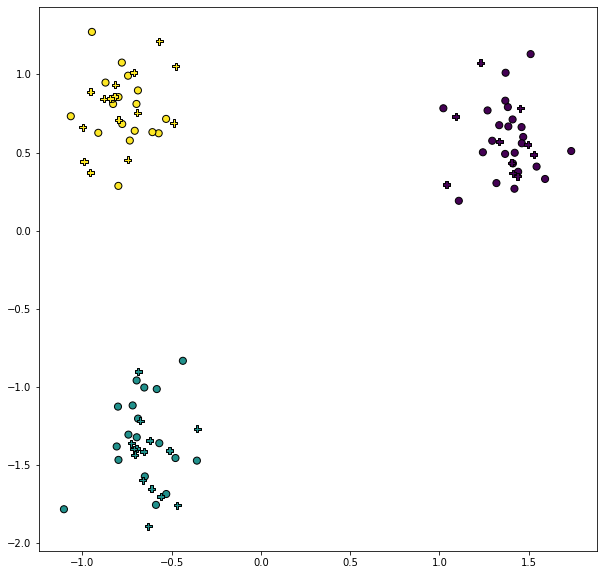

In [ ]:
n_class = 3
# Three examples of synthetic 2D datasets:
X, t = make_blobs(n_features=2, centers = n_class,n_samples=100) 
#X, t = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=24, n_classes=n_class, n_clusters_per_class=1,n_samples=200)
#X, t = make_gaussian_quantiles(n_features=2, n_classes=n_class, n_samples=500)

X = StandardScaler().fit_transform(X)
print(X.shape)

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=.4, random_state=12)

figure = plt.figure(figsize=(10, 10))
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=t_train, s=50, edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='P', c=t_test, s=50, edgecolor='k')

N_train = X_train.shape[0]
N_test = X_test.shape[0]



## Apply feature transform:


In [ ]:

# Define some feature transforms:

def identity(x):
  return(np.hstack((x, np.ones((x.shape[0],1)))))

def feat_transform_2D_prod(x):
  return np.hstack( (x, x**2, (x[:,0]*x[:,1]).reshape((x.shape[0],1)), np.ones((x.shape[0],1))))

feature_transform = identity
#feature_transform = feat_transform_2D_prod



Phi_train = feature_transform(X_train)
n_feat = Phi_train.shape[1]
print('n_feat = ', n_feat)
Phi_test = feature_transform(X_test)


n_feat =  3


## Functions for Multiclass logistic regression:


In [ ]:
# - W is the matrix of size n_feat x n_class

def soft_max(W, Phi):
  # evaluate the softmax vector for a list of feature points phi (given in line) 
  a = W.transpose() @ Phi.transpose() 
  y = np.exp(a)
  s = np.sum(y,axis=0)
  y = (y/s).transpose() # return line for consistency with sklearn
  return(y)

def predicted_class(W,Phi):
  y = soft_max(W, Phi)
  if Phi.ndim==1:
    pred = np.argmax(y)
  else:
    pred = np.argmax(y,axis=1)
  return(pred)

def mloglikelihood(W, Phi, t):
  y = soft_max(W, Phi)
  # extract values of softmax for the class k=t
  if t.ndim == 0:
    y = y[t]
    L = np.log(y)
  else:
    y = y[np.arange(Phi.shape[0]),t]
    L = - np.sum(np.log(y))
  return(L)

def gradmloglikelihood(W, Phi, t):
  y = soft_max(W, Phi)
  # extract values of softmax for the class k=t
  if t.ndim == 0:
    y[t] -= 1
    y.shape = (n_class,1)
    Phi.shape = (1,n_feat)
    g = y @ Phi
  else:
    y[np.arange(Phi.shape[0]),t] = y[np.arange(Phi.shape[0]),t] - 1
    #print(y.shape)
    #print(Phi.shape)
    g = y.transpose() @ Phi
  return(g.transpose())



## Training with gradient descent on full dataset

In [ ]:
# random initialization:
W = np.random.random((n_feat,n_class))


In [ ]:
# run Nit iterations of gradient descent (can be done several times if convergence is not observed):
lr = 1/N_train
Nit = 10**3
print('n = ', 0, ' F(W) = ', mloglikelihood(W, Phi_train, t_train))
for n in range(Nit):
  W -= lr*gradmloglikelihood(W, Phi_train, t_train)
  if n%(Nit//10)==(Nit//10-1):
    print('n = ', n, ' F(W) = ', mloglikelihood(W, Phi_train, t_train))


n =  0  F(W) =  83.19847010206475
n =  99  F(W) =  0.6962000812533394
n =  199  F(W) =  0.3662583462716637
n =  299  F(W) =  0.25177153876339226
n =  399  F(W) =  0.1930194300655507
n =  499  F(W) =  0.15707443078185201
n =  599  F(W) =  0.13273350079370547
n =  699  F(W) =  0.11511843900393025
n =  799  F(W) =  0.10175798030365794
n =  899  F(W) =  0.09126374628830897
n =  999  F(W) =  0.0827945131587655


## Classifier prediction:

In [ ]:
print(W.shape)
print(Phi_test.shape)

pred = predicted_class(W,Phi_test)


print('pred: ', pred[:30])
print('true: ', t_test[:30])


(3, 3)
(40, 3)
pred:  [2 1 2 0 2 1 1 2 2 2 2 2 2 1 1 1 2 1 0 2 1 2 1 0 0 1 2 0 1 2]
true:  [2 1 2 0 2 1 1 2 2 2 2 2 2 1 1 1 2 1 0 2 1 2 1 0 0 1 2 0 1 2]


## Visualize classifiction regions:


(80674,)
(40337, 3)


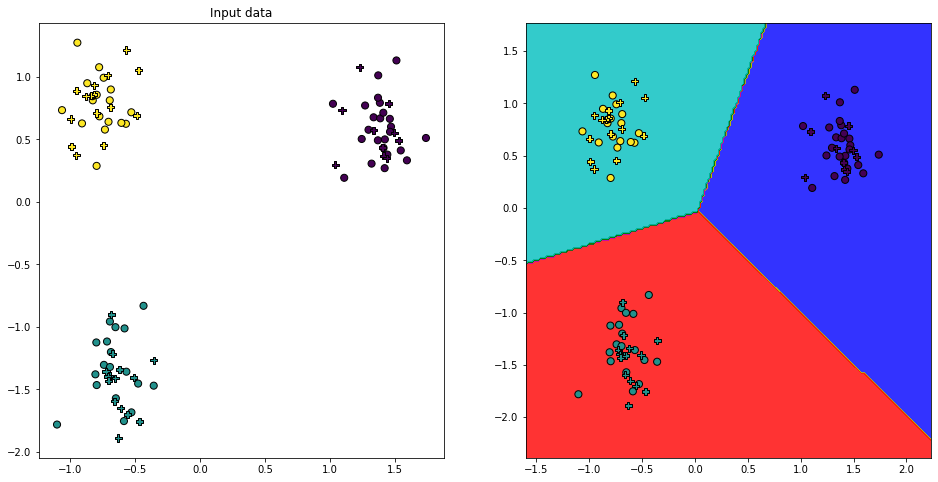

In [ ]:
#visualize results:

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
X_grid = np.hstack((xx.ravel(), yy.ravel()))
print(X_grid.shape)
N_grid = xx.ravel().shape[0]
X_grid = np.c_[xx.ravel(), yy.ravel()]
Phi_grid = feature_transform(X_grid)
print(Phi_grid.shape)
Z = predicted_class(W,Phi_grid)
Z = Z.reshape(xx.shape)

figure = plt.figure(figsize=(16, 8))
ax = plt.subplot(1,2,1)
ax.set_title("Input data")
ax.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=t_train, s=50, edgecolor='k')
ax.scatter(X_test[:, 0], X_test[:, 1], marker='P', c=t_test, s=50, edgecolor='k')
ax = plt.subplot(1,2,2)
cmap = ListedColormap(['b','y','r','m','g','c'])
plt.contourf(xx,yy,Z,  cmap = cmap, alpha=.8)
ax.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=t_train, s=50, edgecolor='k')
ax.scatter(X_test[:, 0], X_test[:, 1], marker='P', c=t_test, s=50, edgecolor='k')


## Classifier performance:

**Exercise**
Evaluate the performance of the classifier using the functions (check their documentation online):

```
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
```

In [ ]:
# TODO:

## Importance of feature transform:

**Exercice**
With the ```gaussian_quantiles``` dataset
1. Test the classifier with the provided feature transform ```identity```. Explain the results.
2. Test the classifier with the provided feature transform ```feat_transform_2D_prod```. Explain the results.
2. Define a feature transform that would correspond to a linear hidden layer with $d=25$ hidden nodes that applies a linear+ReLU where each weight and bias parameter is drawn randomly according to a standard Gaussian distribution (iid entries, fixed and used for all data points). What can you expect for the performance of a neural network and this dataset?


## Stochastic gradient descent:

**Exercise:**

1. Implement an average stochastic gradient descent for solving the optimization problem:

 *At each step:*
 * randomly draw $b=10$ examples of the dataset and use it for a noisy gradient estimate (use eg ```np.random.choice```).
 * Compute the new weight $W^{(n)}$ and the average weights $\bar{W}^{(n)}$ defined by
$$
W^{(n)} = W^{(n-1)} - \tau \nabla F(W^{(n-1)})
$$
$$
\bar{W}^{(n)} = \frac{1}{n+1} \sum_{k=0}^{n} W^{(k)} = \frac{n}{n+1}\bar{W}^{(n-1)} + \frac{1}{n+1}W^{(n)}.
$$

2. Test that the results of the average stochastic gradient procedure are similar than the ones without random selection.



In [ ]:
#TODO.






























If time allows please go through the "Tensors" part of 
DEEP LEARNING WITH PYTORCH: A 60 MINUTE BLITZ
https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

The notebook is here:
https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py

There is a "run in Google Colab" button.


In [ ]:
# Cell for tests
print(W)
print('Tests of soft_max')
print(soft_max(W, Phi_train[0,:]))
print(soft_max(W, Phi_train[1,:]))
print(soft_max(W, Phi_train[0:2,:]))
print('\nTests of mloglikelihood')
print(mloglikelihood(W, Phi_train[0,:], t_train[0]))
print(mloglikelihood(W, Phi_train[0:2,:], t_train[0:2]))
print(mloglikelihood(W, Phi_train, t_train))
print('\nTests of gradmloglikelihood')
print(gradmloglikelihood(W, Phi_train, t_train))
print(gradmloglikelihood(W, Phi_train[0,:], t_train[0]))
